# Import Packages and Load Data 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
import scipy.stats as stats
from sklearn.metrics import SCORERS
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
linreg = LinearRegression()

In [2]:
#import data and info, describe
kc = pd.read_csv('kc_house_data.csv')
kc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


### sqft_basement and date are object variables. Need to check sqft_basement

### Waterfront has a lot of missing data. Consider to put them in the model? Drop NA rows? Imputation? 


In [3]:
# check sqft_basement
# contain "?" ,so the columns is object
kc['sqft_basement'].value_counts().head() 

0.0      12826
?          454
600.0      217
500.0      209
700.0      208
Name: sqft_basement, dtype: int64

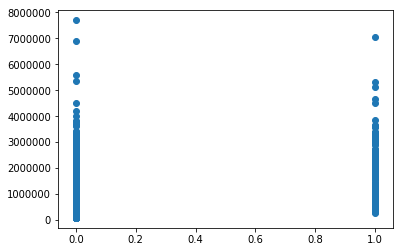

In [4]:
# check waterfront vs price 
# do not see strong difference in price related to 2 group categorized by waterfront column. 

plt.scatter(kc[['waterfront']],kc[['price']])

In [5]:
# check yr_renovated vs price
#plt.scatter(kc[['yr_renovated']],kc[['price']])
kc[kc['yr_renovated'].isnull()]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
12,114101516,5/28/2014,310000.0,3,1.00,1430,19901,1.5,0.0,0.0,...,7,1430,0.0,1927,NaN,98028,47.7558,-122.229,1780,12697
23,8091400200,5/16/2014,252700.0,2,1.50,1070,9643,1.0,NaN,0.0,...,7,1070,0.0,1985,NaN,98030,47.3533,-122.166,1220,8386
26,1794500383,6/26/2014,937000.0,3,1.75,2450,2691,2.0,0.0,0.0,...,8,1750,700.0,1915,NaN,98119,47.6386,-122.360,1760,3573
28,5101402488,6/24/2014,438000.0,3,1.75,1520,6380,1.0,0.0,0.0,...,7,790,730.0,1948,NaN,98115,47.6950,-122.304,1520,6235
40,5547700270,7/15/2014,625000.0,4,2.50,2570,5520,2.0,NaN,0.0,...,9,2570,0.0,2000,NaN,98074,47.6145,-122.027,2470,5669
45,8035350320,7/18/2014,488000.0,3,2.50,3160,13603,2.0,0.0,0.0,...,8,3160,0.0,2003,NaN,98019,47.7443,-121.977,3050,9232
52,7518505990,12/31/2014,600000.0,3,1.75,1410,4080,1.0,0.0,0.0,...,7,1000,410.0,1950,NaN,98117,47.6808,-122.384,1410,4080
56,9478500640,8/19/2014,292500.0,4,2.50,2250,4495,2.0,0.0,0.0,...,7,2250,0.0,2008,NaN,98042,47.3663,-122.114,2250,4500
58,7922800400,8/27/2014,951000.0,5,3.25,3250,14342,2.0,0.0,4.0,...,8,3250,0.0,1968,NaN,98008,47.5880,-122.116,2960,11044


In [6]:
#change date to month:
kc['month'] = kc['date'].map(lambda x: x[:2].replace("/",""))
kc_transform = kc.drop(['date','id'],axis=1)

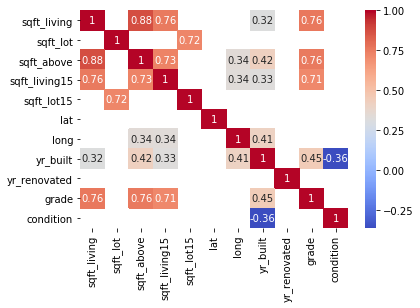

In [7]:
# check correlation matrix among numeric variables
numeric_col = ['sqft_living','sqft_lot','sqft_above','sqft_basement','sqft_living15','sqft_lot15','lat','long','yr_built','yr_renovated','grade','condition','month']
mask = kc_transform[numeric_col].corr().apply(lambda x :np.abs(x)<0.3) 
sns.heatmap(kc_transform[numeric_col].corr(),annot=True,mask = mask,cmap='coolwarm' )

In [8]:
# We can see that although yr_built, condition and longtitude have some correlation with other predictors,
# these relationships are not strong. Thus, we only perform the standardize technique to the variables that has 
# at least 1 correlation > 0.5 or < -0.5 
std_col = ['sqft_living', 'sqft_lot','sqft_above','sqft_living15','sqft_lot15','grade']
ss = StandardScaler()
for i in std_col:
    name = i +'_std'
    kc_transform[name] = ss.fit_transform(kc_transform[[i]].values)
    kc_transform = kc_transform.drop([i],axis=1)


/Users/flatironschool/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/flatironschool/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/flatironschool/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/flatironschool/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/flatironschool/anaconda3/lib/python3.7/site-packages/sklearn/util

In [9]:
kc_transform.columns

Index(['price', 'bedrooms', 'bathrooms', 'floors', 'waterfront', 'view',
       'condition', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'month', 'sqft_living_std', 'sqft_lot_std',
       'sqft_above_std', 'sqft_living15_std', 'sqft_lot15_std', 'grade_std'],
      dtype='object')

# Delete waterfront , yr_renovated

In [10]:
# we will delete out rows contains "?", and convert sqft_basement to numeric
kc_transform = kc_transform.drop(['waterfront','yr_renovated'],axis=1)
kc_transform = kc_transform[kc_transform['sqft_basement']!= '?']
kc_transform['sqft_basement'] = kc_transform['sqft_basement'].map(lambda x: np.float(x))
kc_transform = kc_transform.dropna()
len(kc)-len(kc_transform)

515

In [11]:
# convert zipcode, bedrooms, bathrooms,floors to catergorical and get dummies variables 
for i in ['bathrooms','bedrooms','floors','zipcode']:
    kc_transform[i] = kc_transform[i].map(lambda x: str(x))
kc_transform = pd.get_dummies(kc_transform)
kc_transform.columns

Index(['price', 'view', 'condition', 'sqft_basement', 'yr_built', 'lat',
       'long', 'sqft_living_std', 'sqft_lot_std', 'sqft_above_std',
       ...
       'month_11', 'month_12', 'month_2', 'month_3', 'month_4', 'month_5',
       'month_6', 'month_7', 'month_8', 'month_9'],
      dtype='object', length=142)

In [12]:
# train_test split 
kc_transform['const'] = 1
train_set, test_set = train_test_split(kc_transform,test_size=0.25,random_state=42)

In [13]:
len(kc_transform.drop(['price'],axis=1).columns)

142

In [14]:
X_train = train_set.drop(['price'],axis=1)
#X_train = X_train[['view','sqft_living_std','condition','const']]
predictors = np.asarray(X_train)
model = sm.OLS(train_set['price'], predictors).fit()
model.summary(xname=list(X_train.columns.values),alpha=0.05)
#model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                     506.1
Date:                Wed, 08 May 2019   Prob (F-statistic):               0.00
Time:                        11:45:55   Log-Likelihood:            -2.1185e+05
No. Observations:               15811   AIC:                         4.240e+05
Df Residuals:                   15677   BIC:                         4.250e+05
Df Model:                         133                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
view                8.68e+04   1932.765     44.910      0.000     8.3e+04    9.06e+04
condition          2.707e+04   2230.110     12.137      0.000    2.27e+04    3.14e+04
sqft_basement     -3799.4477    928.503     -4.092      0.000   -5619.420   -1979.475
yr_built           -554.8020     77.884     -7.123      0.000    -707.464    -402.140
lat                1.904e+05   7.36e+04      2.588      0.010    4.62e+04    3.35e+05
long              -1.793e+05   5.15e+04     -3.481      0.001    -2.8e+05   -7.83e+04
sqft_living_std    3.602e+06   8.52e+05      4.225      0.000    1.93e+06    5.27e+06
sqft_lot_std       9185.1542   1888.290      4.864      0.000    5483.889    1.29e+04
sqft_above_std    -3.096e+06   7.69e+05     -4.028      0.000    -4.6e+06   -1.59e+06
sqft_living15_std  9445.0479   2352.991      4.014      0.000    4832.915    1.41e+04
sqft_lot15_std    -5250.9905   1952.604     -2.689      0.007   -9078.320   -1423.661
grade_std          7.094e+04   2518.861     28.165      0.000     6.6e+04    7.59e+04
bedrooms_1        -1.695e+06   4.42e+05     -3.833      0.000   -2.56e+06   -8.28e+05
bedrooms_10       -1.926e+06   4.56e+05     -4.227      0.000   -2.82e+06   -1.03e+06
bedrooms_11       -1.798e+06   4.67e+05     -3.852      0.000   -2.71e+06   -8.83e+05
bedrooms_2        -1.721e+06   4.42e+05     -3.891      0.000   -2.59e+06   -8.54e+05
bedrooms_3        -1.731e+06   4.42e+05     -3.913      0.000    -2.6e+06   -8.64e+05
bedrooms_33       -1.976e-07   3.89e-08     -5.075      0.000   -2.74e-07   -1.21e-07
bedrooms_4        -1.756e+06   4.42e+05     -3.970      0.000   -2.62e+06   -8.89e+05
bedrooms_5        -1.775e+06   4.42e+05     -4.011      0.000   -2.64e+06   -9.07e+05
bedrooms_6        -1.842e+06   4.42e+05     -4.164      0.000   -2.71e+06   -9.75e+05
bedrooms_7        -1.975e+06   4.43e+05     -4.454      0.000   -2.84e+06   -1.11e+06
bedrooms_8        -1.743e+06   4.45e+05     -3.916      0.000   -2.61e+06    -8.7e+05
bedrooms_9        -2.159e+06   4.51e+05     -4.787      0.000   -3.04e+06   -1.27e+06
bathrooms_0.5     -1.117e+06   1.96e+05     -5.694      0.000    -1.5e+06   -7.32e+05
bathrooms_0.75    -1.053e+06   1.75e+05     -6.016      0.000    -1.4e+06    -7.1e+05
bathrooms_1.0     -1.114e+06   1.74e+05     -6.386      0.000   -1.46e+06   -7.72e+05
bathrooms_1.25    -1.269e+06   1.86e+05     -6.836      0.000   -1.63e+06   -9.05e+05
bathrooms_1.5      -1.14e+06   1.74e+05     -6.536      0.000   -1.48e+06   -7.98e+05
bathrooms_1.75    -1.146e+06   1.74e+05     -6.572      0.000   -1.49e+06   -8.04e+05
bathrooms_2.0     -1.142e+06   1.74e+05     -6.546      0.000   -1.48e+06      -8e+05
bathrooms_2.25    -1.139e+06   1.74e+05     -6.527      0.000   -1.48e+06   -7.97e+05
bathrooms_2.5     -1.147e+06   1.74e+05     -6.577      0.000   -1.49e+06

In [15]:
X_train.columns[model.pvalues>0.05]

Index(['bathrooms_5.5', 'bathrooms_6.25', 'zipcode_98033', 'zipcode_98040',
       'zipcode_98102', 'zipcode_98105', 'zipcode_98109', 'zipcode_98112',
       'zipcode_98119'],
      dtype='object')

In [27]:
X_train_1 = X_train[X_train.columns[model.pvalues<0.05]]
X_train_1.head()
predictors_1 = np.asarray(X_train_1)
model_1 = sm.OLS(train_set['price'], predictors_1).fit()
#model_1.summary(xname=list(X_train_1.columns.values))

In [18]:
#np.abs(model_1.params).sort_values(ascending=False)

In [110]:
s[np.abs(s).sort_values(ascending=False).index].head(11)

idx
const             -2.348527e+07
sqft_living_std    4.190907e+06
floors_3.0        -3.987791e+06
floors_2.0        -3.954671e+06
floors_1.5        -3.937615e+06
floors_1.0        -3.933852e+06
floors_2.5        -3.840466e+06
floors_3.5        -3.830879e+06
sqft_above_std    -3.628708e+06
bathrooms_7.75     2.525666e+06
bedrooms_9        -2.482488e+06
Name: values, dtype: float64

In [19]:
s = model_1.params.values
#s.reset_index
s = pd.Series(s, name='values', index=pd.Index(list(X_train_1.columns.values), name='idx'))
s[s[np.abs(s).sort_values(ascending=False).index]>0]

idx
view                 8.470831e+04
condition            2.620186e+04
sqft_living_std      4.190907e+06
sqft_lot_std         8.994838e+03
sqft_living15_std    1.060761e+04
grade_std            7.362069e+04
bathrooms_6.75       1.223193e+06
bathrooms_7.5        2.748540e-07
bathrooms_7.75       2.525666e+06
bathrooms_8.0        1.100239e+06
zipcode_98004        3.504845e+05
zipcode_98039        6.992918e+05
Name: values, dtype: float64

The above are variables that positive correlated to the price. Houses that have larger size ( bigger sqft_living, sqft_lot) and are in 2 zipcodes (98004, 98039) often have the higher prices. Although an owner cannot change the size of their house and its locations, we recommend them to improve the house condition and grade , or build more bathrooms to include the price of the house

In [43]:
# checking cross validation
X = X_train_1
y = train_set['price']
k_fold_model = KFold(n_splits=10,shuffle=True)
0-np.mean(cross_val_score(linreg, X,  y, cv=k_fold_model, scoring="neg_mean_absolute_error"))

96006.83323176671

In [29]:
X_test_1 = test_set[list(X_train_1.columns.values)]
test_predictors_1 = np.asarray(X_test_1)
test_predictors_int_1= sm.add_constant(test_predictors_1)
predictions_1=model_1.predict(test_predictors_int_1)
y_test = test_set['price']

In [112]:
error = y_test-predictions_1
np.mean(np.abs(error))

97855.51414313764

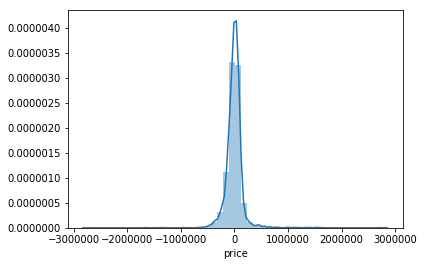

In [183]:
sns.distplot(error)# it the distribution of residuals look normally distributed

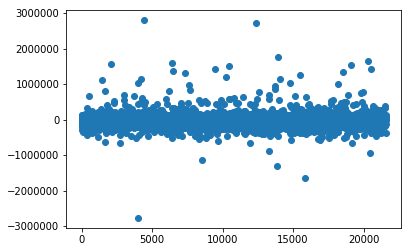

In [247]:
plt.scatter(error.index,error)

In [241]:
np.mean(np.abs(np.mean(y_test)- y_test))

234844.173617808

In [111]:
np.median(np.abs(np.mean(y_test)- y_test))

185763.63915765507

In [113]:
np.median(np.abs(error))

64028.40399744734

{'whiskers': [<matplotlib.lines.Line2D at 0x1c253a5198>,
 'caps': [<matplotlib.lines.Line2D at 0x1c253a5828>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c253a5048>],
 'medians': [<matplotlib.lines.Line2D at 0x1c253a5eb8>],
 'fliers': [<matplotlib.lines.Line2D at 0x1c253ad240>],
 'means': []}

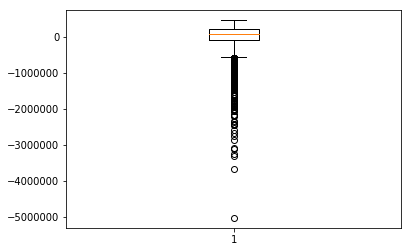

In [60]:
guess_error =np.mean(y_test)- y_test
plt.boxplot(guess_error)

<BarContainer object of 2 artists>

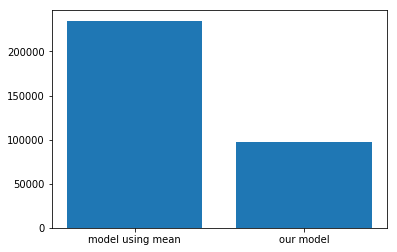

In [67]:
plt.bar(['', 'our model'],[np.mean(np.abs(guess_error)),np.mean(np.abs(error))])

No handles with labels found to put in legend.


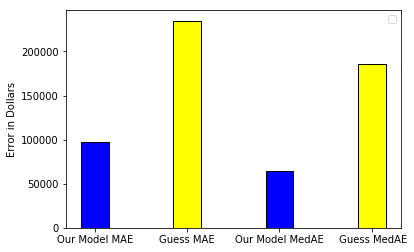

In [106]:
r1 = ['mean', 'median']
r2 = ['mean1', 'median1']
barWidth= 0.3
bars1 = [np.mean(np.abs(error)),np.mean(np.abs(guess_error))]
bars2 = [np.median(np.abs(error)),np.median(np.abs(guess_error))]
yer1 = [0.5, 0.4]
yer2 = [1, 0.7]

plt.bar(r1, bars1, width = barWidth, color = ['blue','yellow'], edgecolor = 'black', yerr=yer1, capsize=1)


# Create cyan bars
plt.bar(r2, bars2, width = barWidth, color = ['blue','yellow'], edgecolor = 'black', yerr=yer2, capsize=1)
 
# general layout
plt.xticks([r for r in range(4)], ['Our Model MAE', 'Guess MAE', 'Our Model MedAE',' Guess MedAE' ])
plt.ylabel('Error in Dollars')
plt.legend()
 
# Show graphic
#plt.show()
plt.savefig('fig5')


If we use the average price as our model, then the mean absolute error is about 234844 and if we use our current model the mean absolute error is about 97124. 

## forward selection

In [23]:
#s[np.abs(s).sort_values(ascending=False).index]

In [45]:
sorted_index = list(np.abs(s).sort_values(ascending=False).index.values)
sorted_index
MAE_list = []

for i in range(1,len(sorted_index)):
    col_list = sorted_index[i]
    X = X_train_1[col_list]
    #print(X)
    y = train_set['price']
    #k_fold_model = KFold(n_splits=5,shuffle=True)
    k_fold_model = 10
    MAE = 0-np.mean(cross_val_score(linreg, X,  y, cv=k_fold_model, scoring="neg_mean_absolute_error"))
    MAE_list.append(MAE)


In [50]:
#MAE_list

In [51]:
def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True):
    """ Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

In [54]:
stepwise_list = stepwise_selection(X_train,train_set['price'],verbose = False)

/Users/flatironschool/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:43: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.


# Consider  Houses < 4M

In [291]:
kc_transform_4 = kc_transform[kc_transform[['price']] < 4000000]
#kc_transform_4 = kc_transform.drop(['waterfront','yr_renovated'],axis=1)
#kc_transform_4 = kc_transform_4[kc_transform['sqft_basement']!= '?']
#kc_transform_4['sqft_basement'] = kc_transform_4['sqft_basement'].map(lambda x: np.float(x))
#kc_transform_4 = kc_transform_4.dropna()
len(kc)-len(kc_transform_4)

515

In [275]:
kc.groupby(['view','yr_renovated']).size()

view  yr_renovated
0.0   0.0             15397
      1940.0              2
      1944.0              1
      1945.0              3
      1946.0              1
      1948.0              1
      1950.0              1
      1951.0              1
      1953.0              1
      1954.0              1
      1955.0              3
      1956.0              2
      1957.0              2
      1958.0              2
      1959.0              1
      1960.0              3
      1963.0              3
      1964.0              5
      1965.0              3
      1967.0              2
      1968.0              5
      1969.0              2
      1970.0              8
      1972.0              3
      1973.0              4
      1974.0              2
      1975.0              5
      1976.0              1
      1977.0              6
      1978.0              2
                      ...  
3.0   2015.0              2
4.0   0.0               217
      1958.0              1
      1963.0              1
 

In [115]:
len(kc['zipcode'].value_counts())

70